In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
lor=pd.read_excel("for_annotations_relations_lorenzo_try.xlsx")
ric=pd.read_excel("annotations 2000.xlsx")
ric=ric.iloc[0:2000,:]
lor=lor.iloc[0:2170,:]

In [67]:
ric.drop(['Column1'],axis=1,inplace=True)
lor.drop(['Unnamed: 0'],axis=1,inplace=True)

In [68]:
final=pd.concat([lor,ric]).reset_index(drop=True)

In [69]:
final.loc[1693,"is_valuable"]=1

<AxesSubplot: xlabel='is_valuable', ylabel='Count'>

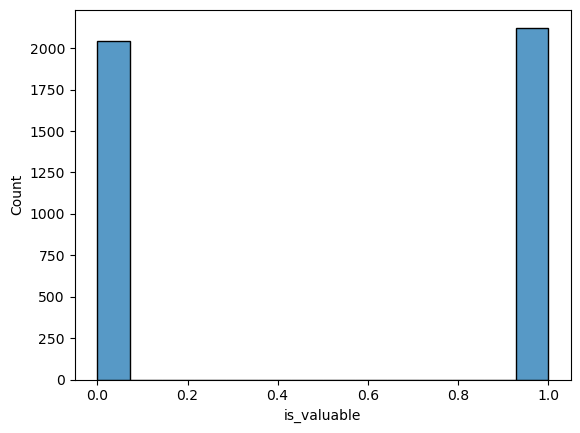

In [70]:
sns.histplot(final["is_valuable"])

In [71]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
final.loc[:, 'arg1'] = final.loc[:, 'arg1'].apply(lambda x: model.encode(x))
final.loc[:, 'rel'] = final.loc[:, 'rel'].apply(lambda x: model.encode(x))
final.loc[:, 'arg2'] = final.loc[:, 'arg2'].apply(lambda x: model.encode(x))

In [72]:
embeddings_arg1 = np.vstack(final.loc[:, 'arg1'].values)
embeddings_rel = np.vstack(final.loc[:, 'rel'].values)
embeddings_arg2 = np.vstack(final.loc[:, 'arg2'].values)

In [83]:
final.loc[:, 'negated']=final.loc[:, 'negated'].apply(lambda x: 1 if x==True else 0)
final.loc[:, 'passive']=final.loc[:, 'passive'].apply(lambda x: 1 if x==True else 0)
negated = np.expand_dims(final.loc[:, 'negated'].values, axis=1)
passive = np.expand_dims(final.loc[:, 'passive'].values, axis=1)
confidence= final.loc[:, ['confidence']].values

In [84]:
X = np.hstack([embeddings_arg1, embeddings_rel, embeddings_arg2, negated, passive, confidence])

In [96]:
y=final.loc[:, 'is_valuable'].astype(int).values

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create a Random Forest Classifier with desired parameters
rf_classifier = RandomForestClassifier(random_state=42)
score = cross_val_score(rf_classifier, X, y, cv=5,error_score='raise')

0.49184652278177465


In [100]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X,y)

RandomForestClassifier(random_state=42)

In [101]:
from joblib import dump
dump(model, 'model_file.joblib')

['model_file.joblib']